In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [2]:
P = {1: 1, 2: 0,}

In [3]:
# x's [-10, 10]
X = torch.from_numpy(np.linspace(-10, 10, 1000)).float().unsqueeze(1)
#the f function f(x) = sin(x*sqrt(p[1]+1))+cos(x*sqrt(p[2]+1))
Y = torch.sin(X*np.sqrt(P[1] + 1))+torch.cos(X * np.sqrt(P[2] + 1))

In [4]:
dataloader=DataLoader(TensorDataset(X,Y),batch_size=100,shuffle=True)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(1,200),nn.ReLU(),
            nn.Tanh(),
            nn.Linear(200,1),
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)



In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
optim=torch.optim.Adam(Net.parameters(net),lr=1e-3)
#loss function used is mean square error
Loss=nn.MSELoss()

step: 100 , loss: 0.2420227825641632
step: 200 , loss: 0.13103947043418884
step: 300 , loss: 0.07578983902931213
step: 400 , loss: 0.07957873493432999
step: 500 , loss: 0.041840411722660065
step: 600 , loss: 0.04397235065698624
step: 700 , loss: 0.043290697038173676
step: 800 , loss: 0.03321777656674385
step: 900 , loss: 0.021049629896879196
step: 1000 , loss: 0.01307095866650343


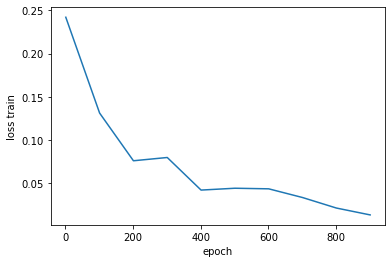

In [7]:
# Train a total of 1000 times
losses = np.zeros(10)
counter = 0
for epoch in range(1000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    if (epoch+1)%100==0:
        losses[counter] = loss.item()
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
        counter+=1
        
plt.plot(range(1,1001,100), losses)
plt.xlabel("epoch")
plt.ylabel("loss train")
plt.show()

In [8]:
#predictions for trained model 
predict=net(X.to(device))

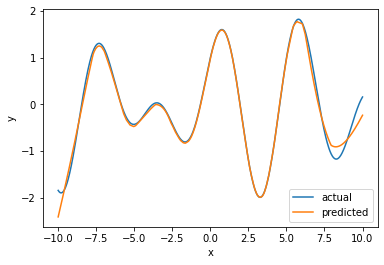

In [9]:
x, y = X.detach().cpu().numpy(), Y.detach().cpu().numpy()
plt.plot(x,y,label="actual")
plt.plot(x,predict.detach().numpy(),label="predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()